<a href="https://colab.research.google.com/github/cagBRT/computer-vision/blob/master/opencvKMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use KMeans to find dominate color values in an image

upload batman.png, thematrix.png, jp.png

In [ ]:
import numpy as np
import imutils
import cv2
from google.colab.patches import cv2_imshow

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [ ]:
def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)

	# normalize the histogram, such that it sums to one
	hist = hist.astype("float")
	hist /= hist.sum()

	# return the histogram
	return hist

def plot_colors(hist, centroids):
	# initialize the bar chart representing the relative frequency
	# of each of the colors
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0

	# loop over the percentage of each cluster and the color of
	# each cluster
	for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	
	# return the bar chart
	return bar

In [ ]:
# load the image and convert it from BGR to RGB so that
# we can dispaly it with matplotlib
image = cv2.imread("batman.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

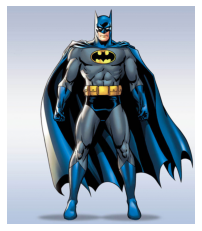

In [ ]:
# show our image
plt.figure()
plt.axis("off")
plt.imshow(image)

In [ ]:
x= int(image.shape[1]/3)

In [ ]:
# reshape the image to be a list of pixels
image = image.reshape((image.shape[0] * x, 3))

ValueError: ignored

In [ ]:
# cluster the pixel intensities
clt = KMeans(n_clusters = 4)
clt.fit(image)

ValueError: ignored

In [ ]:
# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)

AttributeError: ignored

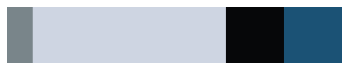

In [ ]:
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()